In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from argopy import DataFetcher as ArgoDataFetcher

argo_loader = ArgoDataFetcher()

ds = argo_loader.float([6902746, 6902747, 6902757, 6902766]).to_xarray()
df = ds.to_dataframe()


df.dropna()
df['YEAR'] = pd.DatetimeIndex(df['TIME']).year
df['DATE'] = df['TIME'].dt.date
df_temp = df.rename(columns={'PRES': 'PRESSURE', 'PSAL': 'SALINITY','TEMP':'TEMPERATURE'})

df_temp.to_csv('task1_data.csv',index=False)


/Users/vivekpatel/opt/anaconda3/envs/course_project_env/lib/python3.9/site-packages/argopy/stores/filesystems.py:18: UserWarning: argopy needs tqdm installed to display progress bars
  warnings.warn("argopy needs tqdm installed to display progress bars")
/Users/vivekpatel/opt/anaconda3/envs/course_project_env/lib/python3.9/site-packages/argopy/plotters.py:33: UserWarning: argopy requires cartopy installed for full map plotting functionality
  warnings.warn("argopy requires cartopy installed for full map plotting functionality")


In [2]:
data = pd.read_csv('task1_data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150442 entries, 0 to 150441
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CONFIG_MISSION_NUMBER  150442 non-null  int64  
 1   CYCLE_NUMBER           150442 non-null  int64  
 2   DATA_MODE              150442 non-null  object 
 3   DIRECTION              150442 non-null  object 
 4   PLATFORM_NUMBER        150442 non-null  int64  
 5   POSITION_QC            150442 non-null  int64  
 6   PRESSURE               150442 non-null  float64
 7   PRES_QC                150442 non-null  int64  
 8   SALINITY               150442 non-null  float64
 9   PSAL_QC                150442 non-null  int64  
 10  TEMPERATURE            150442 non-null  float64
 11  TEMP_QC                150442 non-null  int64  
 12  TIME_QC                150442 non-null  int64  
 13  LATITUDE               150442 non-null  float64
 14  LONGITUDE              150442 non-nu

In [3]:
plt.rcParams.update({'font.size': 16})
# Make a dropdown to select the Year, or "All"
year = widgets.Dropdown(
    options=['All'] + list(data['YEAR'].unique()),
    value='All',
    description='Year:',
)

def plotit(year):
    df2 = data.copy()
    if year != 'All':
            df2 = df2[df2.YEAR == year]
            
    if len(df2) > 0:
        fig = plt.figure(figsize=(20,15))
        ax = plt.axes(projection='3d')
        zdata = df2['TEMPERATURE'] 
        xdata = df2['LATITUDE']
        ydata = df2['LONGITUDE']
        ax.scatter3D(xdata, ydata, zdata, c=zdata);
        ax.set_xlabel("Latitude")
        ax.set_ylabel("Longitude")
        ax.set_zlabel("Temperature")
        plt.title("Scatter plot for position of ARGO flot data for {} year".format(year) )
        plt.colorbar()
        plt.savefig('plot1.png')
        plt.show();

    else:
        print("No data to show for current selection")        



interactive(children=(Dropdown(description='Year:', options=('All', 2017, 2018, 2019, 2020, 2021), value='All'…

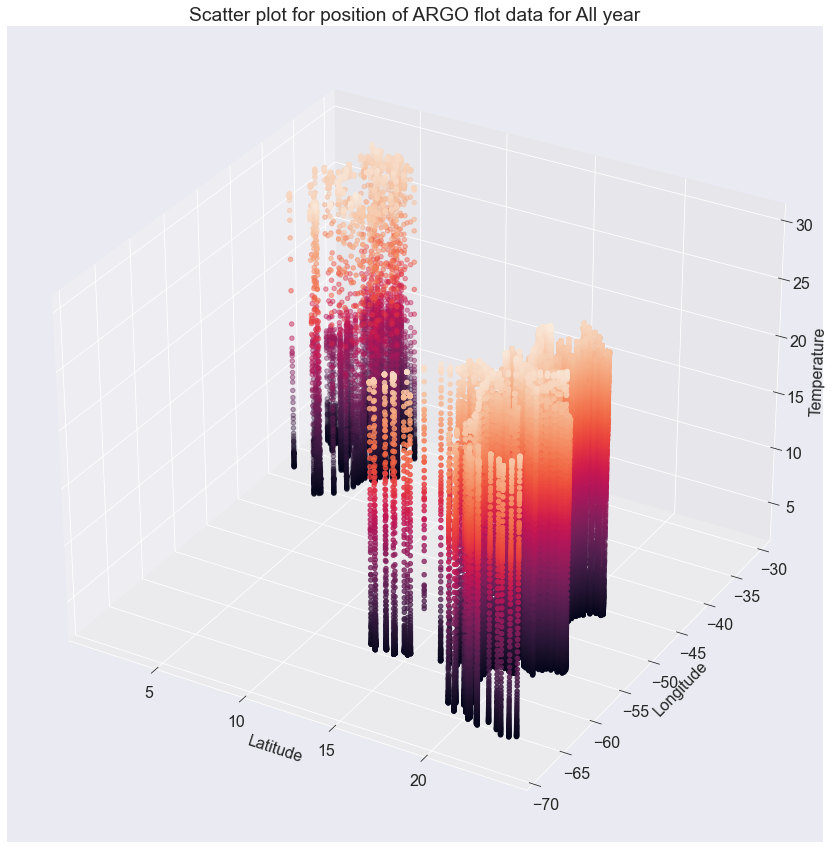

In [4]:
interactive(plotit, year=year)